In [ ]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Load test data
test_df = pd.read_csv("cleaned_test.csv")
customer_ids = test_df['Customer_ID']

In [ ]:
scaler = StandardScaler()
scaler.fit(test_df)
test_scaled = scaler.transform(test_df)

In [ ]:
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

In [ ]:
with open("finalized_model.sav", "rb") as f:
    model = pickle.load(f)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 30 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
features = ['luxury_sales', 'fresh_sales', 'dry_sales', 'outlet_city']
X_test = test_df[features].copy()

In [ ]:
scaler.fit(test_df[features])

StandardScaler()

In [ ]:
outlet_city_encoder = LabelEncoder()
outlet_city_encoder.fit(test_df['outlet_city'])
test_df['outlet_city'] = outlet_city_encoder.transform(X_test['outlet_city'])

In [ ]:
with open("outlet_city_encoder.pkl", "rb") as f:
    outlet_city_encoder = pickle.load(f)

X_test['outlet_city'] = outlet_city_encoder.transform(X_test['outlet_city'])

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test_scaled.shape)

(40749, 4)


In [ ]:
predictions = model.predict(X_test_scaled)

1274/1274 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [ ]:
# Confirm dimensions match
assert len(predictions) == len(customer_ids), "Prediction length mismatch with customer IDs."

In [ ]:
import numpy as np

# Get class predictions from probability output
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)  # Converts from shape (n_samples, n_classes) to (n_samples,)

1274/1274 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
# Now create the output DataFrame
output_df = pd.DataFrame({
    'customer_id': customer_ids,
    'predicted_customer_segmentation': predicted_classes
})

In [ ]:
# Save to CSV
output_df.to_csv("predicted_customer_segmentations.csv", index=False)
print("✅ Prediction complete. File saved: predicted_customer_segmentations.csv")

✅ Prediction complete. File saved: predicted_customer_segmentations.csv


In [ ]:
predicted = pd.read_csv("predicted_customer_segments.csv")
predicted.head()

,customer_id,predicted_customer_segmentation
0,33574,0
1,10089,0
2,38329,0
3,11376,0
4,12410,0


<ipython-input-181-0ddbe1ec8e20>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_customer_segmentation', data=output_df, palette='viridis')


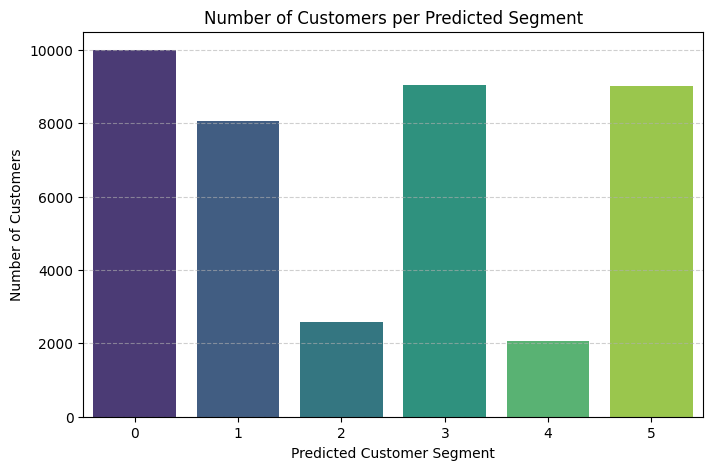

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count how many customers in each predicted segment
plt.figure(figsize=(8, 5))
sns.countplot(x='predicted_customer_segmentation', data=output_df, palette='viridis')

plt.title('Number of Customers per Predicted Segment')
plt.xlabel('Predicted Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

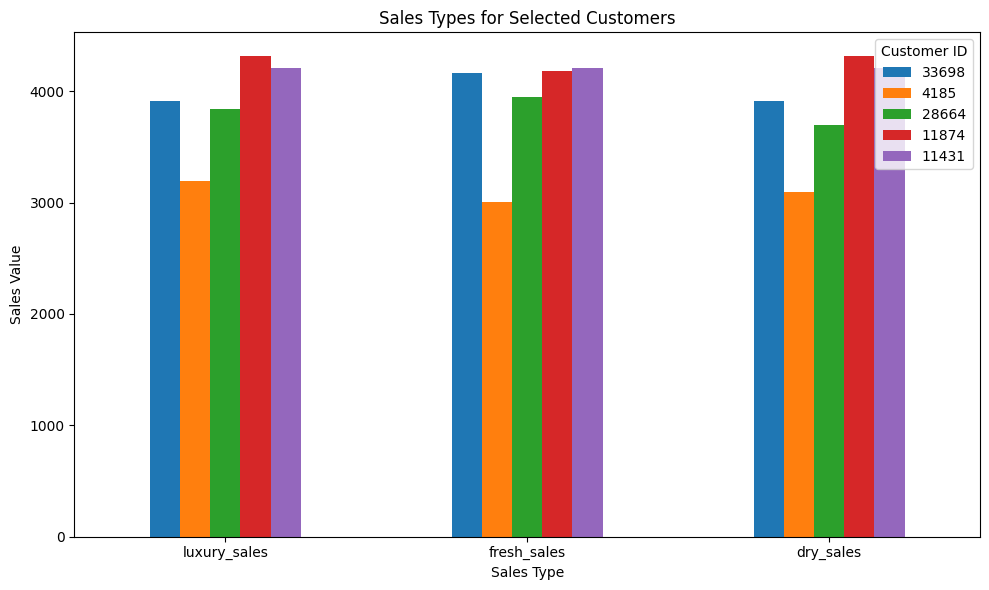

In [ ]:
import matplotlib.pyplot as plt

selected_customers = test_df.loc[test_df['Customer_ID'].isin([33698, 4185, 28664, 11874, 11431])]

#extract sales data
sales_data = selected_customers[['luxury_sales', 'fresh_sales', 'dry_sales']]

#transpose data for plotting
sales_data = sales_data.T
sales_data.columns = selected_customers['Customer_ID']

#plot
sales_data.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Types for Selected Customers')
plt.xlabel('Sales Type')
plt.ylabel('Sales Value')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Customer ID')
plt.tight_layout()
plt.show()